In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.my_util import preprocess, create_co_matrix, ppmi

In [2]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [4]:
# 共起行列
print(C[0])
# ppmi行列
print(W[0])
# SVD行列
print(U[0])

[0 1 0 0 0 0 0]
[0.        1.8073549 0.        0.        0.        0.        0.       ]
[ 3.4094876e-01 -1.1102230e-16 -1.2051624e-01 -4.1633363e-16
 -9.3232495e-01 -1.1102230e-16 -2.4257469e-17]


In [5]:
# 次元削減
print(U[0, :2])

[ 3.4094876e-01 -1.1102230e-16]


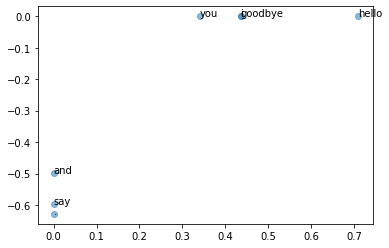

In [6]:
# 各単語を二次元のベクトルで表し可視化
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()